## Task 1: Load Data & Import Libraries

**Goal:** Set up your environment and download the dataset for analysis.

### Instructions:

1. Download the dataset using `opendatasets`.  
   - Dataset URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results  
   - You may need to provide your Kaggle API credentials.


2. Set file paths for:
   - `athlete_data_filename` → `athlete_events.csv`
   - `regions_data_filename` → `noc_regions.csv`


3. Install and import the following libraries:
   - `pandas`, `numpy`
   - `matplotlib.pyplot`, `seaborn`
   - `plotly.express`
   - `ListedColormap` from `matplotlib.colors`


**Expected Output:**

- Dataset downloaded

- All libraries successfully imported

- File paths assigned

In [2]:
# 1. Download the dataset using `opendatasets`:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results')

Skipping, found downloaded files in "./120-years-of-olympic-history-athletes-and-results" (use force=True to force download)


In [3]:
# 2. Set file paths:
athlete_data_filename = './120-years-of-olympic-history-athletes-and-results/athlete_events.csv'
regions_data_filename = './120-years-of-olympic-history-athletes-and-results/noc_regions.csv'

In [6]:
# 3. Install and import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap

##  Task 2: Set Plot Style and Color Palette

Goal: Customize the appearance of your plots for consistent and clean visuals.

Instructions:
1. Set the global style for all plots using plt.style.use().
    - Use 'ggplot' for a simple, clean base style.
2. Define a custom color palette:
    - Use a list of hex color codes.
    - Example: ["#0a2e36", "#27FB6B", "#14cc60", "#036d19", "#09a129"]

3. Apply the color palette using Seaborn:
    - Use sns.set_palette().

In [5]:
# 1. Set the global style for all plots:
plt.style.use('ggplot')

In [6]:
# 2. Define a custom color palette:
custom_colors = ["#0d0887", "#5302a3", "#8b0aa5", "#b83289", "#db5c68", "#f48849", "#febd2a", "#f0f921"]

In [7]:
# 3. Apply the color palette:
sns.set_palette(custom_colors)

## Task 3: Data Preparation

Goal: Prepare data for analysis.

Steps:
1. Load the file using pandas.
2. Look for some of the information about the data and the columns.
3. Fix any of the missing or incorrect values.
4. Which, and how much data types are in the dataset.
5. List the minimum age on the competence.

The focus of this EDA project will solely be on the "Summer Olympics", filter of all the "Winter Olympics Games" from the dataset.

In [8]:
# 1. Load the file using pandas.
athletes_df = pd.read_csv(athlete_data_filename)
regions_df = pd.read_csv(regions_data_filename)

In [9]:
# 2. Look for some of the information about the data and the columns.
athletes_df.head(10)
# regions_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [10]:
# 3. Fix any of the missing or incorrect values.

# Athletes Dataset
    # Look for NULL values
athletes_df.isnull().sum()
    # Replace the NULL values in the "Medal" column for "None"
    # 'Age', 'Height' and 'Weight columns are omitted as they are in task 5.
athletes_df.fillna({'Medal':'None'}, inplace=True)

# Region Dataset
    # Look for NULL values
regions_df.isnull().sum()
    # Replace the NULL values in the "notes" column for "None"
regions_df.fillna({'notes':'None'}, inplace=True)
    # 'region' column has 3 NULL values which values are in the 'notes' column.
    # Replace the NULL values in the "region" column for the corresponding values in the "notes"
mask = regions_df['region'].isnull()
regions_df.loc[mask, 'region'] = regions_df.loc[mask, 'notes']

#  Note: In the Athletes table there are a NOC value "SGP" which represents Singapur by the ISO 3166.
#  Insert the NOC value "SGP" in the Region table
new_row = {
    'NOC':   'SGP',
    'region':'Singapur',
    'notes': 'None'
}
regions_df.loc[len(regions_df)] = new_row

In [11]:
# 4. Which, and how much data types are in the dataset.
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [12]:
# 5. List the minimum age on the competence.
minimum_age = athletes_df['Age'].min()
print(minimum_age)

10.0


In [13]:
# 6. Filter of all the "Winter Olympics Games" from the dataset
summer_athletes_df = (athletes_df.loc[athletes_df['Season'] == "Summer"])
summer_athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   222552 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 27.2+ MB


## Task 4: Merging The Two Datasets Into One

**Goal:** Merge datasets.

Before we can begin analyzing the data, we need to combine the two datasets:  
- `athlete_events.csv` (athlete information)
- `noc_regions.csv` (region/country information)

Use the `pandas.merge()` function to do this.

###  Steps:

1. **Call `pd.merge()`**  
   This function merges two DataFrames based on one or more common columns (known as keys).

2. **Set merge type and key**  
   We'll perform a **left join** on the `NOC` column:
   - This keeps **all records** from `athlete_events` (left DataFrame).
   - It adds matching `region` data from `noc_regions` (right DataFrame).
   - Rows with no match in the right DataFrame will have `NaN` values in those columns.


In [14]:
# 1. Call `pd.merge()` and 2. Set merge type and key
summer_athletes_regions_df = pd.merge(summer_athletes_df, regions_df, how='left', on='NOC')
summer_athletes_regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222552 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   222552 non-null  object 
 15  region  222552 non-null  object 
 16  notes   222552 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 28.9+ MB


In [15]:
# filas_region_nan = summer_athletes_regions_df[summer_athletes_regions_df['Name'].isnull()]
# filas_region_nan.tail(10)

summer_athletes_regions_df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,None,Argentina,None
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,None,USA,None
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,None,Russia,None
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,None,Russia,None
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,None,Belarus,None


## Task 5: Finding and Replacing The Null Values In Our Dataset

**Goal:** Data cleaning and exploratory analysis.

### Cleaning Tasks:

- Visualize the distribution of missing values using pie charts or bar plots.

- Calculate and list the percentage of null values for each column. Replace missing values with the mean of the respective column when appropriate.

- Remove duplicate entries from the dataset to ensure accuracy.

### Exploratory Questions:

1. Which country has sent the most athletes to the Summer Olympics?

2. How has the number of athletes, countries, and events changed over time?

3. Which nations have won the most Olympic medals?

4. How has participation by male and female athletes evolved over time?

5. What is the correlation between the height and weight of Olympic participants?

6. In which sports has India won Olympic medals?

7. Which sports have contributed the most medals overall?

In [16]:
# Remove duplicate entries from the dataset to ensure accuracy.
summer_athletes_regions_df = summer_athletes_regions_df.drop_duplicates()
summer_athletes_regions_df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,None,Argentina,None
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,None,USA,None
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,None,Russia,None
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,None,Russia,None
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,None,Belarus,None


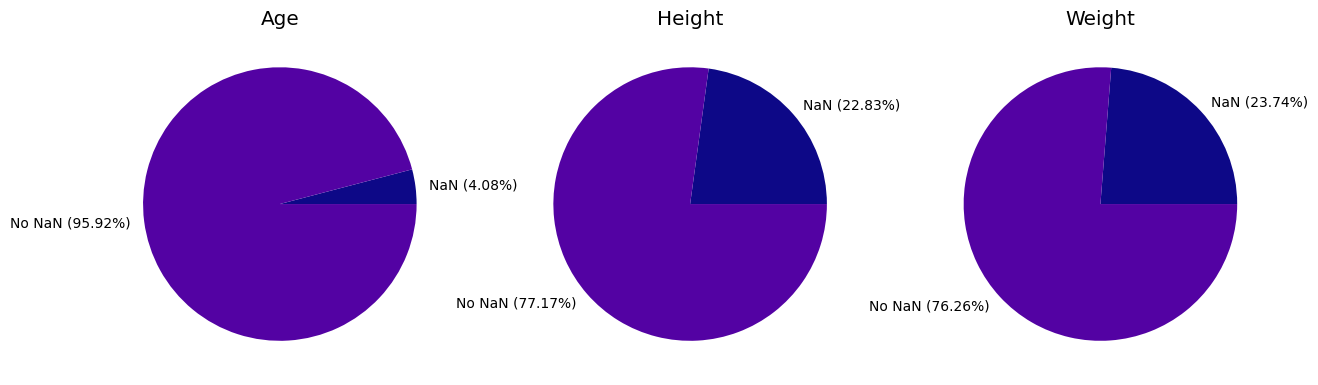

In [17]:
# Visualize the distribution of missing values using pie charts or bar plots.

    # Calculating the porcentages of null values
missing_values = summer_athletes_regions_df.isnull().sum()
missing_values = missing_values[missing_values>0]
percentage = (missing_values / len(summer_athletes_regions_df)) * 100

    # Plotting
fig, ax = plt.subplots(ncols=len(missing_values), figsize=(5*len(missing_values), 6))

titles = ['Age', 'Height', 'Weight']
for i in range (len(percentage)):
    img1 = ax[i].pie([percentage.iloc[i], 100 - percentage.iloc[i]], labels=[f'NaN ({percentage.iloc[i]:.2f}%)', f'No NaN ({100-percentage.iloc[i]:.2f}%)'])
    ax[i].set_title(titles[i])

In [18]:
titles = ['Age', 'Height', 'Weight']
for i in range (len(percentage)):
    print (percentage.iloc[i])
    print (titles[i])

4.082887591729327
Age
22.833424516315727
Height
23.740431438686606
Weight


In [19]:
# Replace missing values with the mean of the respective column when appropriate.

# Our first approach was to filter by the mean considering the Sport and Sex, however some sports doesn't have enough data to consider a mean.
# Then we only consider a mean by sex for each category:
 
mean_ages = round(summer_athletes_regions_df.groupby('Sex')['Age'].mean())
print(mean_ages)
mean_heights = round(summer_athletes_regions_df.groupby('Sex')['Height'].mean(), 1)
print(mean_heights)
mean_weights = round(summer_athletes_regions_df.groupby('Sex')['Weight'].mean(), 1)
print(mean_weights)

# Replace the NaN cell with the corresponding average values.
summer_athletes_regions_df['Age'] = summer_athletes_regions_df['Age'].fillna(summer_athletes_regions_df['Sex'].map(mean_ages))
summer_athletes_regions_df['Height'] = summer_athletes_regions_df['Height'].fillna(summer_athletes_regions_df['Sex'].map(mean_heights))
summer_athletes_regions_df['Weight'] = summer_athletes_regions_df['Weight'].fillna(summer_athletes_regions_df['Sex'].map(mean_weights))
print(summer_athletes_regions_df.isnull().sum())

Sex
F    24.0
M    26.0
Name: Age, dtype: float64
Sex
F    168.2
M    178.9
Name: Height, dtype: float64
Sex
F    60.1
M    75.6
Name: Weight, dtype: float64
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
notes     0
dtype: int64


In [20]:
# 1. Which country has sent the most athletes to the Summer Olympics?
athlete_counts = summer_athletes_regions_df.groupby('region')['ID'].nunique()
# print(athlete_counts)
top_country = athlete_counts.idxmax()
top_count   = athlete_counts.max()
print(f"{top_country} has sent the most athletes with {top_count} participants")

USA has sent the most athletes with 7970 participants


In [21]:
# 2. How has the number of athletes, countries, and events changed over time?
yearly = (summer_athletes_regions_df.groupby('Year').agg({
              'ID':     'nunique',   # unique athletes
              'region': 'nunique',   # unique countries
              'Event':  'nunique'    # unique events
          })
          .rename(columns={
              'ID':     'n_athletes',
              'region': 'n_countries',
              'Event':  'n_events'
          })
          .reset_index()
         )
yearly.head()

,Year,n_athletes,n_countries,n_events
0,1896,176,12,43
1,1900,1224,31,90
2,1904,650,14,95
3,1906,841,20,74
4,1908,2024,22,109


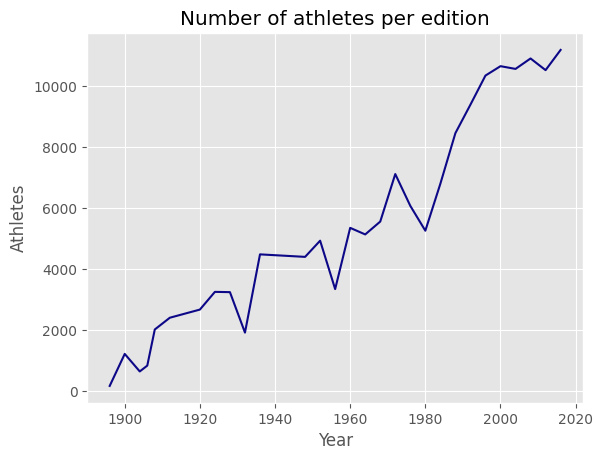

In [22]:
# Athletes over the time
plt.figure()
plt.plot(yearly['Year'], yearly['n_athletes'])
plt.title('Number of athletes per edition')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.show()

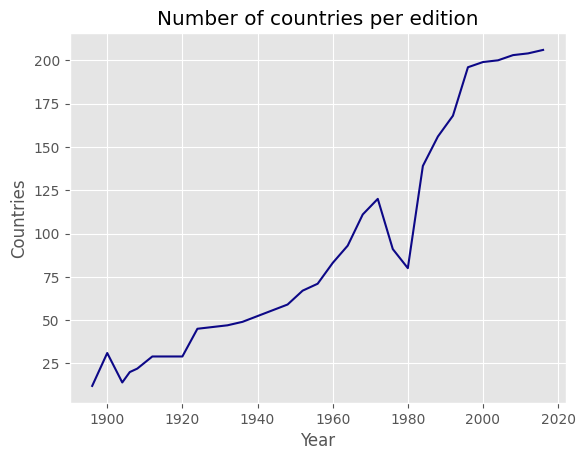

In [23]:
# Countries over the time
plt.figure()
plt.plot(yearly['Year'], yearly['n_countries'])
plt.title('Number of countries per edition')
plt.xlabel('Year')
plt.ylabel('Countries')
plt.show()

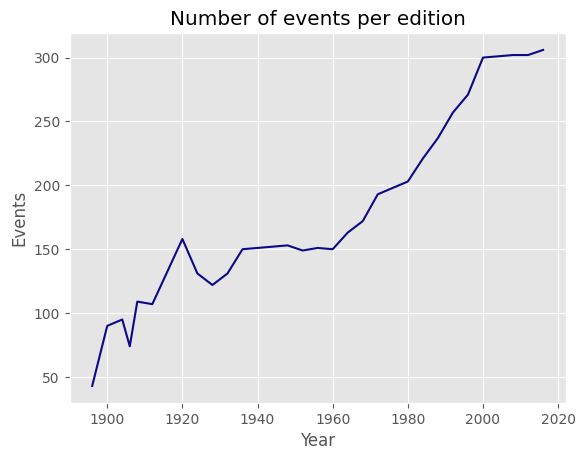

In [24]:
# Events over the time
plt.figure()
plt.plot(yearly['Year'], yearly['n_events'])
plt.title('Number of events per edition')
plt.xlabel('Year')
plt.ylabel('Events')
plt.show()

Answer: The number of athletes, countries, and events have increased over the time.

In [25]:
# 3. Which nations have won the most Olympic medals?
# There are 3 types of medals: 'Gold', 'Silver' and 'Bronze'
gold_medals_df = (summer_athletes_regions_df.loc[summer_athletes_regions_df['Medal'] == "Gold"])
gold_medal_counts = (gold_medals_df.groupby('region')['Medal'].count().sort_values(ascending=False))
# print(gold_medal_counts)
print(f"{gold_medal_counts.idxmax()} has the most Golden medals with {gold_medal_counts.max()}")

silver_medals_df = (summer_athletes_regions_df.loc[summer_athletes_regions_df['Medal'] == "Silver"])
silver_medals_counts = (silver_medals_df.groupby('region')['Medal'].count().sort_values(ascending=False))
# print(silver_medals_counts)
print(f"{silver_medals_counts.idxmax()} has the most Silver medals with {silver_medals_counts.max()}")

bronze_medals_df = (summer_athletes_regions_df.loc[summer_athletes_regions_df['Medal'] == "Bronze"])
bronze_medals_counts = (bronze_medals_df.groupby('region')['Medal'].count().sort_values(ascending=False))
# print(bronze_medals_counts)
print(f"{bronze_medals_counts.idxmax()} has the most Bronze medals with {bronze_medals_counts.max()}")

USA has the most Golden medals with 2472
USA has the most Silver medals with 1333
USA has the most Bronze medals with 1197


In [26]:
# 4. How has participation by male and female athletes evolved over time?
gender_yearly = summer_athletes_regions_df.groupby(['Year', 'Sex'])['ID'].nunique().unstack(fill_value=0)
gender_yearly.head()



Sex,F,M
Year,,
1896,0,176
1900,23,1201
1904,6,644
1906,6,835
1908,44,1980


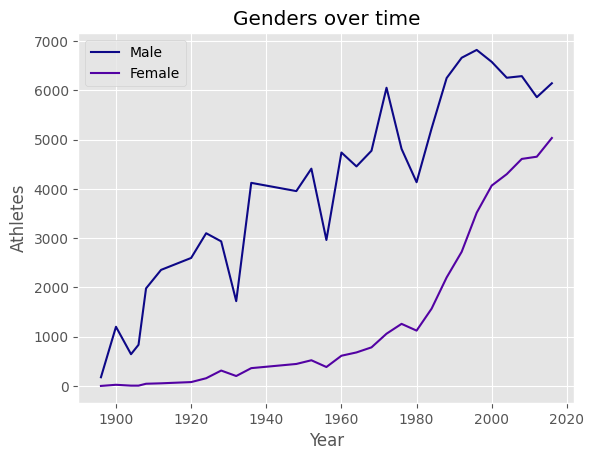

In [27]:
plt.figure()
plt.plot(gender_yearly.index, gender_yearly['M'], label='Male')
plt.plot(gender_yearly.index, gender_yearly['F'], label='Female')
plt.title('Genders over time')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.legend()
plt.show()

Answer: The number of female participants has increased over the time.

In [28]:
# 5. What is the correlation between the height and weight of Olympic participants?
correlation = summer_athletes_regions_df[['Height', 'Weight']].corr()
print(correlation)

          Height    Weight
Height  1.000000  0.793861
Weight  0.793861  1.000000


Answer: The correlation between the height and weight of the Summer Olympic participants is 0.793861

In [29]:
# 6. In which sports has India won Olympic medals?
india_medals = summer_athletes_regions_df[
    (summer_athletes_regions_df['region'] == 'India') & ((summer_athletes_regions_df['Medal'] != 'None'))
]
# india_medals
india_medals_by_sport = india_medals['Sport'].unique()
print("India has won medals in the following sports:")
for sport in india_medals_by_sport:
    print(f"- {sport}")


India has won medals in the following sports:
- Hockey
- Shooting
- Wrestling
- Boxing
- Weightlifting
- Badminton
- Tennis
- Athletics


In [30]:
# 7. Which sports have contributed the most medals overall?
medals_only = summer_athletes_regions_df[summer_athletes_regions_df['Medal'] != 'None']
# medals_only

# Medals per sport
medals_by_sport = (medals_only.groupby('Sport')['Medal'].count().sort_values(ascending=False))
medals_by_sport.head()

Sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: Medal, dtype: int64

Answer: the sports that has the most medals are: Athletics with 3969, Swimming with 3048, Rowing with 2945, Gymnastics with 2256 and Fencing with 1743


##  Task 6: Exploratory Analysis and Visualisations

**Goal:** Data analysis and visualization.

### 1. Create a word-cloud that graphically shows the nations that have sent the maximum number of athletes over the years.

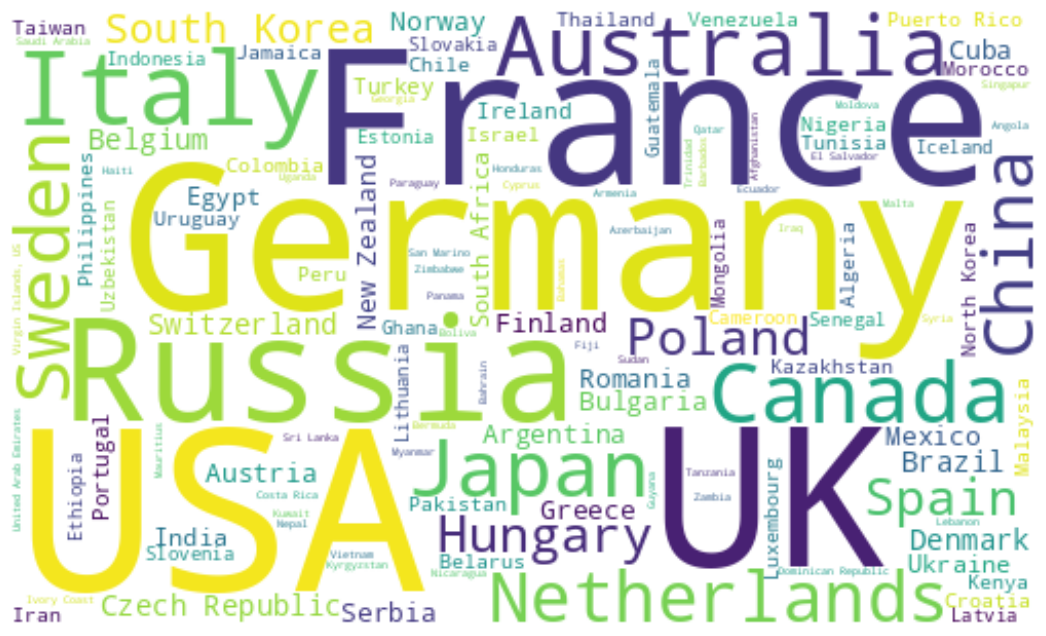

In [31]:
from wordcloud import WordCloud
athlete_counts = summer_athletes_regions_df.groupby('region')['ID'].nunique()
athlete_counts_dict = athlete_counts.to_dict()
# athlete_counts_dict

wordcloud = WordCloud(width=500, height=300, background_color='white').generate_from_frequencies(athlete_counts_dict)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Show the relation between various features and labels in the Olympics dataset and infere/discuss any trends and correlations.

In [32]:
# The features and labels in the Olympics dataset are:
# Sex, Age, Height, Weight, Team, NOC, Games, Year, Season,	City, Sport, Event,	Medal, region
# We can make correlation with the numeric values (Age, Height and Weight)
# but also, those values may differ by taking in count their sex.

print('################################################################')
# Correlation of the athletes by Sex taking in count Age, Height and Weight
correlation_SHW = summer_athletes_regions_df.groupby('Sex')[['Age', 'Height', 'Weight']].corr()
print(correlation_SHW)

print('################################################################')
# Correlation of the athletes by Medal taking in count Age, Height and Weight
correlation_MHW = summer_athletes_regions_df.groupby('Medal')[['Age', 'Height', 'Weight']].corr()
print(correlation_MHW)
print('################################################################')

################################################################
                 Age    Height    Weight
Sex                                     
F   Age     1.000000  0.183461  0.226584
    Height  0.183461  1.000000  0.743870
    Weight  0.226584  0.743870  1.000000
M   Age     1.000000  0.003655  0.083669
    Height  0.003655  1.000000  0.720981
    Weight  0.083669  0.720981  1.000000
################################################################
                    Age    Height    Weight
Medal                                      
Bronze Age     1.000000  0.077267  0.126110
       Height  0.077267  1.000000  0.790840
       Weight  0.126110  0.790840  1.000000
Gold   Age     1.000000  0.084801  0.144279
       Height  0.084801  1.000000  0.798968
       Weight  0.144279  0.798968  1.000000
None   Age     1.000000  0.142886  0.204474
       Height  0.142886  1.000000  0.792173
       Weight  0.204474  0.792173  1.000000
Silver Age     1.000000  0.084121  0.139188
       Height 

Answer: 

Sex Correlations:
1. Height and Weight are highly related between both sexs (F: 0.74 and M: 0.72), which is reasonable since the higher the weighter.
2. In females, Age has a moderate correlation between Height and Weight.
3. In males, Age is poorly correlated with Height and Weight which may result in a bigger age distribution.

Medal Correlations:
1. In all the cases, the correlation between Height and Weight is strong.
2. Those who did not win a medal have a higher correlation between age and physical characteristics that the medalists. This may be because non-medal athletes have a greater age variability or participate in events where age is a more determining factor.

### 3. Make a plot of the overall spread of the age of athletes in the Summer Olympics and discuss your findings.

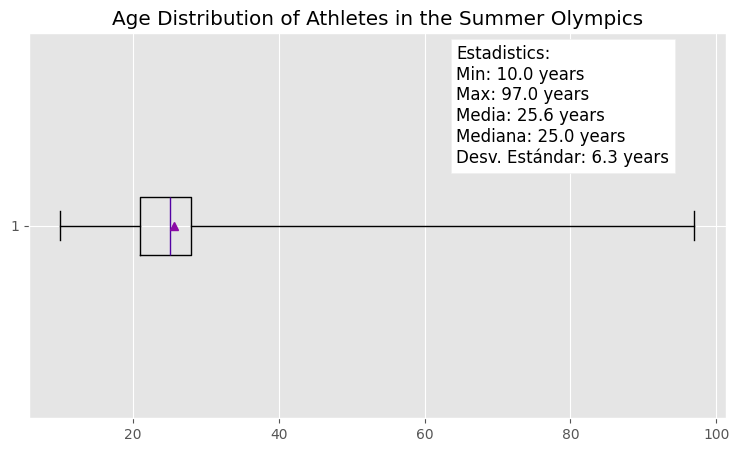

In [33]:
plt.figure(figsize=(9, 5))
plt.boxplot(summer_athletes_regions_df['Age'], vert=False, showmeans=True, whis=10)
plt.title('Age Distribution of Athletes in the Summer Olympics')

edad_min = summer_athletes_regions_df['Age'].min()
edad_max = summer_athletes_regions_df['Age'].max()
edad_media = summer_athletes_regions_df['Age'].mean()
edad_mediana = summer_athletes_regions_df['Age'].median()
edad_std = summer_athletes_regions_df['Age'].std()

stats_text = (
    f'Estadistics:\n'
    f'Min: {edad_min} years\n'
    f'Max: {edad_max} years\n'
    f'Media: {edad_media:.1f} years\n'
    f'Mediana: {edad_mediana:.1f} years\n'
    f'Desv. Estándar: {edad_std:.1f} years'
)

plt.figtext(0.6, 0.62, stats_text, bbox=dict(facecolor='white'), fontsize=12)
plt.show()

Answer:

A wide age range is evident from 10 to 97, which indicates a large inclusion of participants by age.

The most common age of participants is between 20 and 30 years old. This indicates that these are the age ranges in which athletes are most competitive. In fact, the median and mean are 25 and 25.6, respectively.

There are also older participants because there are competitions where age is neither an impediment nor a determining factor.


### 4. Make a plot of the number of participants in the Summer Olympics over the years and discuss the overall trends.

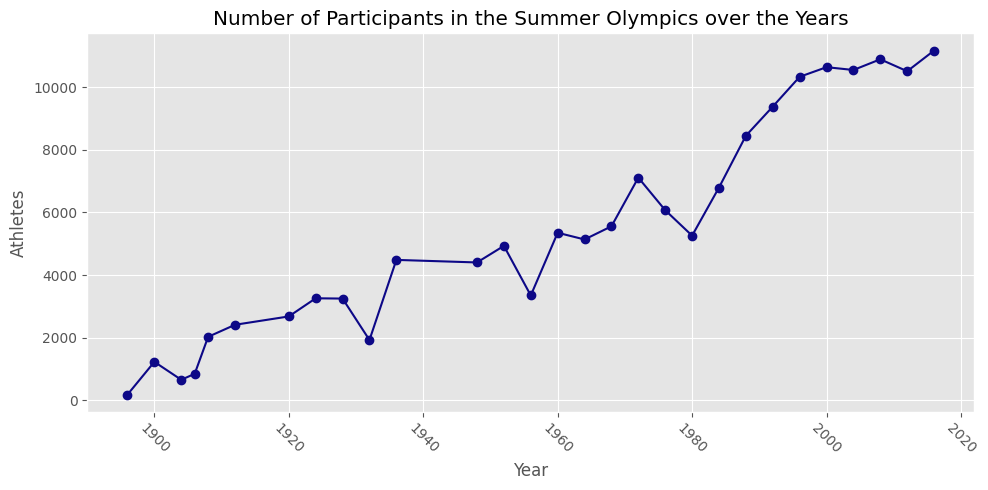

In [34]:
# summer_athletes_regions_df.info()
# Note: There are several athletes that participate in different Sports in the same Year. 
#       We decided not to take in count repeated participants in the same year.
participants_by_year = summer_athletes_regions_df.groupby('Year')['ID'].nunique()
# participants_by_year

plt.figure(figsize=(10, 5))
plt.plot(participants_by_year.index, participants_by_year.values, marker='o')
plt.title('Number of Participants in the Summer Olympics over the Years')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.grid(True)
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

Answer: There has been sustained growth from the first Games until the 21st century. Furthermore, declines in the trend can be observed during the war years (1914, 1940, 1944, etc.). Starting in 1980, more countries joined the Olympic Games, and women's participation began to become standardized.

### 5. Describe the variation in the number of female participants over the years in the Summer Olympics.

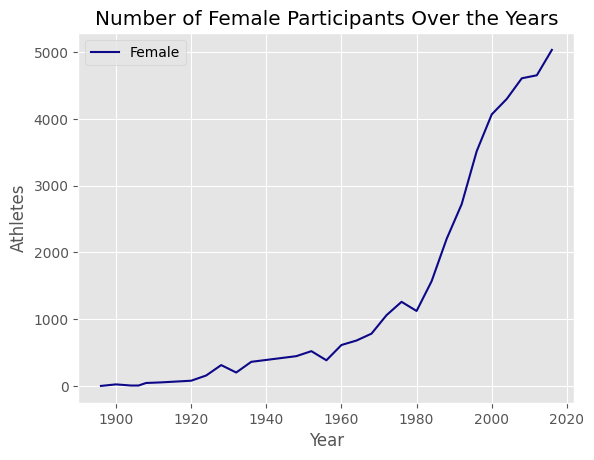

In [35]:
plt.figure()
plt.plot(gender_yearly.index, gender_yearly['F'].values, label='Female')
plt.title('Number of Female Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.legend()
plt.show()

Answer:

Overall, female participation in the Summer Olympics is growing exponentially.

In the begining (1900 - 1920) the participating of famales is very low,and has a slow increase between 1920 and 1960. After that, the increase is very pronounced due to the struggles for gender equality rights.

### 6. Show graphically the variation of the number of female participants in comparison to male participants over the years.

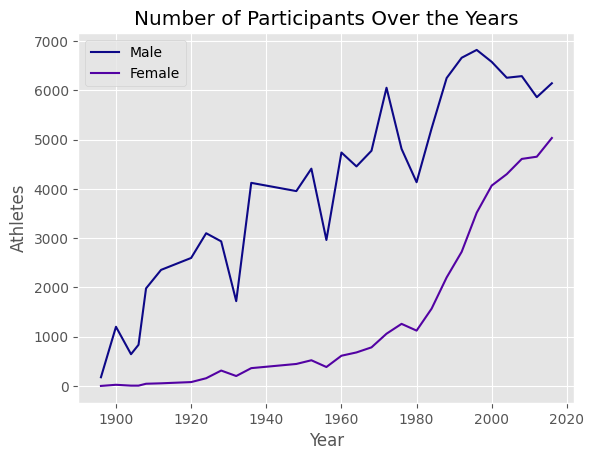

In [36]:
plt.figure()
plt.plot(gender_yearly.index, gender_yearly['M'], label='Male')
plt.plot(gender_yearly.index, gender_yearly['F'], label='Female')
plt.title('Number of Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.legend()
plt.show()

### 7. Create a scatter plot of the relationship between Height Vs Weight Vs Age of participants across sports. Any conclusions?

ValueError: The number of FixedLocator locations (1000), usually from a call to set_ticks, does not match the number of labels (52).

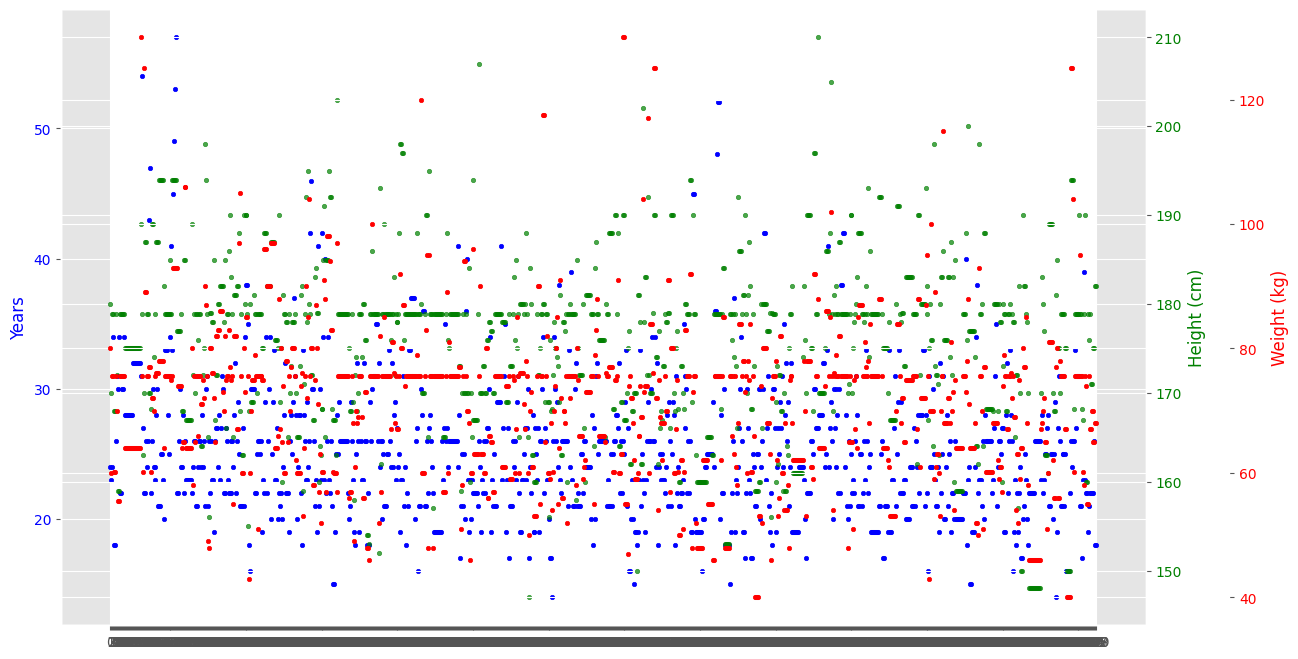

In [43]:
sport_stats = summer_athletes_regions_df.groupby('Sport').agg({
    'Age': 'mean',
    'Weight': 'mean',
    'Height': 'mean'
}).reset_index()

x = range(1000)
width = 0.2

fig, ax1 = plt.subplots(figsize=(14, 8))

# Years
scat_age = ax1.scatter([i - width for i in x], summer_athletes_regions_df['Age'], color='blue', label="Edad (años)", s=10)
ax1.set_ylabel('Years', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Height
ax2 = ax1.twinx()
scat_height = ax2.scatter(x, summer_athletes_regions_df['Height'][:1000], color='green', label="Height (cm)", s=10, alpha=0.7)
ax2.set_ylabel('Height (cm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Weight
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
scat_weight = ax3.scatter([i + width for i in x], summer_athletes_regions_df['Weight'][:1000], color='red', label="Weight (kg)", s=10)
ax3.set_ylabel('Weight (kg)', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# X (Sport)
plt.xticks(x, sport_stats['Sport'])
plt.xlabel('Sport')
plt.title('Height Vs Weight Vs Age across sports')

# Añadir leyenda combinada
lines = [scat_age, scat_height, scat_weight]
labels = ["Years", "Height (cm)", "Weight (kg)"]
plt.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()

### 8. Find and list the top 10 nations that have won the most Gold, Silver, and Bronze Medals, respectively, in the history of the Summer Olympics.

In [ ]:
medals_df = summer_athletes_regions_df[summer_athletes_regions_df['Medal'] != 'None']
medals_by_type = (medals_df.groupby(['region', 'Medal'])['ID'].count().unstack(fill_value=0))

top_10_gold = medals_by_type.sort_values(by='Gold', ascending=False).head(10)
top_10_silver = medals_by_type.sort_values(by='Silver', ascending=False).head(10)
top_10_bronze = medals_by_type.sort_values(by='Bronze', ascending=False).head(10)

print('################################################################')
print(top_10_gold['Gold'])
print('################################################################')
print(top_10_silver['Silver'])
print('################################################################')
print(top_10_bronze['Bronze'])
print('################################################################')

################################################################
region
USA          2472
Russia       1220
Germany      1075
UK            635
Italy         518
France        463
Hungary       432
Australia     362
Sweden        354
China         335
Name: Gold, dtype: int64
################################################################
region
USA          1333
Germany       987
Russia        974
UK            729
France        567
Italy         474
Australia     456
Sweden        396
Hungary       328
China         319
Name: Silver, dtype: int64
################################################################
region
USA            1197
Germany        1064
Russia          994
UK              620
France          587
Australia       515
Italy           454
Netherlands     371
Hungary         363
Sweden          358
Name: Bronze, dtype: int64
################################################################


### 9. Create a word-cloud showing sports in which India has won medals over the years.

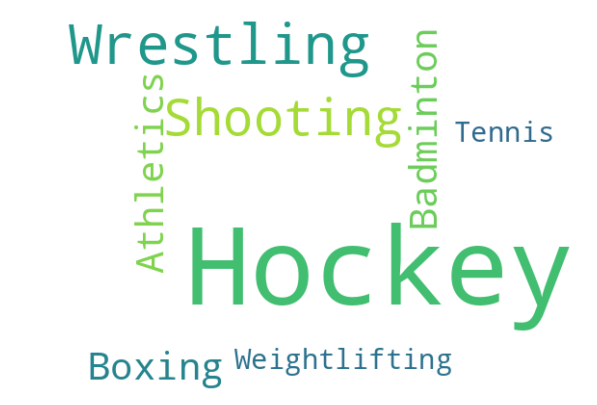

In [ ]:
india_medals_df = summer_athletes_regions_df[
    (summer_athletes_regions_df['region'] == 'India') &
    (summer_athletes_regions_df['Medal'] != 'None')
]

sport_counts = india_medals_df['Sport'].value_counts()
sport_freq = sport_counts.to_dict()
# sport_freq

wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(sport_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Sports in which India has Won Medals Over the Years')
plt.show()


### 10. Look up and list the top 3 female athletes by the number of awarded medals across all sports.

In [ ]:
female_medalists = summer_athletes_regions_df[
    (summer_athletes_regions_df['Sex'] == 'F') &
    (summer_athletes_regions_df['Medal'] != 'None')
]

medals_by_female_athlete = (
    female_medalists
    .groupby('Name')['Medal']
    .count()
    .sort_values(ascending=False)
)

# the top 3 female athletes by the number of awarded medals across all sports are:
medals_by_female_athlete.head(3)

Name
Larysa Semenivna Latynina (Diriy-)      18
Dara Grace Torres (-Hoffman, -Minas)    12
Birgit Fischer-Schmidt                  12
Name: Medal, dtype: int64

## Optional: Additional tasks
  - Make a Choropleth Map mark the countries and explain why there is a sudden exponential drop in the number of participants at three instances in the historical timeline of the Olympics.
  - Does Wealth (GDP) have any effect on a country's performance in the Olympics?

  You can use this dataset for this: GDP dataset that can merged with the above dataset to perform this analysis.

1. What is the relation between a countries climate and their olympic medal tally?
2. Does home advantage give countries an edge in their medals tally? (Linearcurve)
3. Does an athele's height have any role to play in winning an olympic medal? (Heatmap)
4. You can add the Paralympics dataset to this link data too
5. Replace the pie charts with sunburst charts at places where it is possible

  - Make a Choropleth Map mark the countries and explain why there is a sudden exponential drop in the number of participants at three instances in the historical timeline of the Olympics.

  - Does Wealth (GDP) have any effect on a country's performance in the Olympics?

### DGP Dataset

In [9]:
url = "https://raw.githubusercontent.com/bhushanrane29/Summer-Olympics-EDA/master/gdp_data.csv"
gdp_df = pd.read_csv(url)
gdp_df

,Country,Code,Year,GDP-Growth,GDP-Per-Capita,GDP
0,Aruba,ABW,1960,NaN,NaN,NaN
1,Afghanistan,AFG,1960,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,NaN
...,...,...,...,...,...,...
15043,Kosovo,XKX,2016,4.145372,4193.631327,7.738508e+09
15044,"Yemen, Rep.",YEM,2016,-2.701475,667.945437,1.903557e+10
15045,South Africa,ZAF,2016,0.787056,7439.919412,4.298757e+11
15046,Zambia,ZMB,2016,3.794901,1672.345428,2.901824e+10


2. Does home advantage give countries an edge in their medals tally? (Linearcurve)